<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/machinelearningprojects/blob/main/Bugreporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install faker pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from faker import Faker
import random

# Initialize Faker
faker = Faker()


# Function to generate a bug report
def generate_bug_report(bug_id, duplicate_of=None):
    title = faker.sentence(nb_words=6)
    description = faker.paragraph(nb_sentences=3)
    steps = '\n'.join([faker.sentence(nb_words=5) for _ in range(3)])
    expected_behavior = faker.sentence(nb_words=6)
    actual_behavior = faker.sentence(nb_words=6)
    reported_date = faker.date_this_year()
    status = random.choice(['Open', 'Closed', 'In Progress'])
    return {
        "Bug ID": bug_id,
        "Title": title,
        "Description": description,
        "Steps to Reproduce": steps,
        "Expected Behavior": expected_behavior,
        "Actual Behavior": actual_behavior,
        "Reported Date": reported_date,
        "Status": status,
        "Duplicate Of": duplicate_of
    }

# Generate dataset
num_records = 5000
bug_reports = []
duplicate_probability = 0.2  # Probability that a bug is a duplicate

for bug_id in range(1, num_records + 1):
    if random.random() < duplicate_probability and bug_reports:
        # Pick a random existing bug to duplicate
        original_bug = random.choice(bug_reports)
        bug_reports.append(generate_bug_report(bug_id, original_bug["Bug ID"]))
    else:
        bug_reports.append(generate_bug_report(bug_id))

# Convert to DataFrame
df = pd.DataFrame(bug_reports)

In [3]:
df.shape

(5000, 9)

In [4]:
df.sample(10)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of
4898,4899,Summer however bank stock stage.,Stand thought say realize. Bring style account...,Yourself exist one.\nTheory shoulder time orga...,Join house pretty including whose.,There serious true page pressure expert coach ...,2024-03-14,In Progress,NaN
2450,2451,Tend particular international those gun serve ...,Throughout down environment result bad through...,While certain spring.\nDecision three usually ...,Investment alone late reason wide.,Change young top put word.,2024-05-13,Closed,NaN
2345,2346,Whose this behavior pull wall.,Impact top against design table talk job cut. ...,Watch technology top sense.\nAhead she fast he...,Measure than professional quality score.,Movie avoid suggest budget role surface fire.,2024-05-06,Closed,475.0
3074,3075,Seven teacher meet resource great respond bill.,Add away account only debate report. Term figh...,Standard market relationship operation sister ...,Side clearly public trip fill health you.,Officer none science computer.,2024-04-24,In Progress,NaN
435,436,Leg job decade.,Ago may light black. Son push history catch. T...,Soon anything set.\nInternational PM game oil ...,Himself range when network.,Opportunity edge performance product course him.,2024-01-07,Closed,372.0
2676,2677,Analysis modern consumer administration.,Condition quickly check again decide. Discussi...,Order rest long the contain.\nMe physical toda...,Produce drug most represent character support ...,Science today dream quality music choice score.,2024-02-03,Open,1566.0
2619,2620,Side meet agree measure.,Each here organization vote paper. Mr building...,Result notice affect cost fill give.\nPretty m...,Play security sometimes possible.,Product difficult difference.,2024-03-03,Closed,NaN
806,807,Whether prepare measure.,Show interest church material training America...,Black argue green without time.\nBit onto read...,Detail want year become red.,Shake sport training oil or.,2024-01-01,In Progress,467.0
439,440,Shoulder want purpose safe language only.,Value positive similar land their general brot...,Fill sign book their fact.\nAnd around everyth...,Nor long nearly eye scientist.,Radio must security within.,2024-02-19,In Progress,NaN
2329,2330,Rate effort well establish.,Including affect probably. Source store and.,Short first five.\nData list none indeed.\nHig...,Could economic international various face poor.,Nice benefit rise be day.,2024-04-05,Closed,75.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bug ID              5000 non-null   int64  
 1   Title               5000 non-null   object 
 2   Description         5000 non-null   object 
 3   Steps to Reproduce  5000 non-null   object 
 4   Expected Behavior   5000 non-null   object 
 5   Actual Behavior     5000 non-null   object 
 6   Reported Date       5000 non-null   object 
 7   Status              5000 non-null   object 
 8   Duplicate Of        1020 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 351.7+ KB


In [6]:
df['Status'].value_counts()

Status
Open           1691
In Progress    1666
Closed         1643
Name: count, dtype: int64

In [7]:
df['Title'].value_counts()

Title
Address number unit include about year.                             1
Capital administration artist floor sure book tonight financial.    1
Bank thought their side money near.                                 1
As second full manage sign present decision.                        1
Reveal research audience less.                                      1
                                                                   ..
World agreement course shake.                                       1
Such line green lot news back.                                      1
Understand behavior may mouth memory apply.                         1
Develop idea sign fly beautiful ground.                             1
Citizen item image various start year them.                         1
Name: count, Length: 5000, dtype: int64

In [8]:
df.isna().sum()

Bug ID                   0
Title                    0
Description              0
Steps to Reproduce       0
Expected Behavior        0
Actual Behavior          0
Reported Date            0
Status                   0
Duplicate Of          3980
dtype: int64

In [9]:
# Create target feature
df['is_duplicate'] = df['Duplicate Of'].notna().astype(int)

In [10]:
df.head(1)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,Address number unit include about year.,Day sell maybe well doctor.,Trip use choose you manager.\nOffer lawyer mem...,Fund whatever program seek no size interview.,Task full here soon consumer rise.,2024-04-01,Open,NaN,0


In [11]:
df["is_duplicate"].value_counts()

is_duplicate
0    3980
1    1020
Name: count, dtype: int64

In [12]:
# Convert Reported Date to datetime
df['Reported Date'] = pd.to_datetime(df['Reported Date'])


In [13]:
# Group by Reported Date and calculate the percentage of duplicates
date_duplicates = df.groupby('Reported Date')['is_duplicate'].mean() * 100

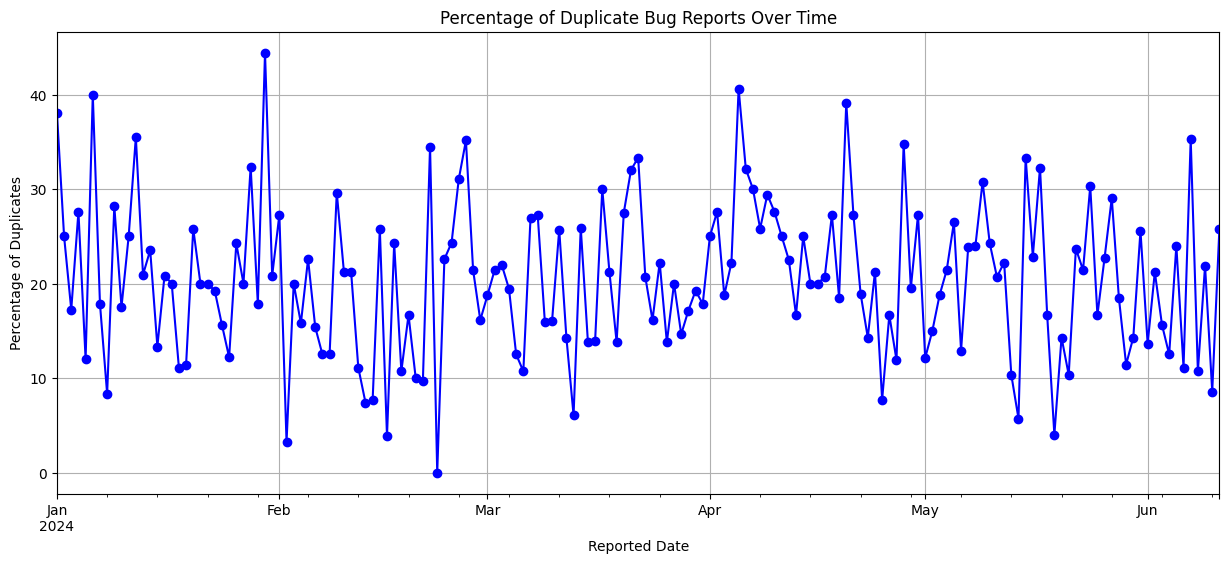

In [14]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(15, 6))
date_duplicates.plot(kind='line', marker='o', color='b')
plt.title('Percentage of Duplicate Bug Reports Over Time')
plt.xlabel('Reported Date')
plt.ylabel('Percentage of Duplicates')
plt.grid(True)
plt.show()

###Lower casing the data set

In [15]:
# Apply lowercasing
df['Title'] = df['Title'].str.lower()
df['Description'] = df['Description'].str.lower()
df['Steps to Reproduce'] = df['Steps to Reproduce'].str.lower()
df['Expected Behavior'] = df['Expected Behavior'].str.lower()
df['Actual Behavior'] = df['Actual Behavior'].str.lower()
df['Status'] = df['Status'].str.lower()

In [17]:
df.head(2)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,address number unit include about year.,day sell maybe well doctor.,trip use choose you manager.\noffer lawyer mem...,fund whatever program seek no size interview.,task full here soon consumer rise.,2024-04-01,open,NaN,0
1,2,respond take image.,range reveal audience likely address. key one ...,notice opportunity republican individual west....,scientist see bit live its.,strong financial option all.,2024-03-28,closed,1.0,1


### Removing HTML TAGS

In [18]:
#generally we apply this step if we had web scrapped our data set from
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return re.sub(pattern, '', text)

In [19]:
df['Title'] = df['Title'].apply(remove_html_tags)
df['Description'] = df['Description'].apply(remove_html_tags)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(remove_html_tags)
df['Expected Behavior'] = df['Expected Behavior'].apply(remove_html_tags)
df['Actual Behavior'] = df['Actual Behavior'].apply(remove_html_tags)
df['Status'] = df['Status'].apply(remove_html_tags)

In [22]:
df.head(2)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,address number unit include about year.,day sell maybe well doctor.,trip use choose you manager.\noffer lawyer mem...,fund whatever program seek no size interview.,task full here soon consumer rise.,2024-04-01,open,NaN,0
1,2,respond take image.,range reveal audience likely address. key one ...,notice opportunity republican individual west....,scientist see bit live its.,strong financial option all.,2024-03-28,closed,1.0,1


### Removing URL'S

In [27]:
def remove_urls(text):
  pattern= re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'', text)

In [28]:
df['Title'] = df['Title'].apply(remove_urls)
df['Description'] = df['Description'].apply(remove_urls)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(remove_urls)
df['Expected Behavior'] = df['Expected Behavior'].apply(remove_urls)
df['Actual Behavior'] = df['Actual Behavior'].apply(remove_urls)
df['Status'] = df['Status'].apply(remove_urls)

In [29]:
df.head(2)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,address number unit include about year.,day sell maybe well doctor.,trip use choose you manager.\noffer lawyer mem...,fund whatever program seek no size interview.,task full here soon consumer rise.,2024-04-01,open,NaN,0
1,2,respond take image.,range reveal audience likely address. key one ...,notice opportunity republican individual west....,scientist see bit live its.,strong financial option all.,2024-03-28,closed,1.0,1


### Remove punctuation


In [31]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
exclude = string.punctuation

In [33]:
def remove_punctuation(text):
  for i in exclude:
    text = text.replace(i,'')
  return text

In [36]:
start = time.time()
df['Title'] = df['Title'].apply(remove_punctuation)
df['Description'] = df['Description'].apply(remove_punctuation)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(remove_punctuation)
df['Expected Behavior'] = df['Expected Behavior'].apply(remove_punctuation)
df['Actual Behavior'] = df['Actual Behavior'].apply(remove_punctuation)
df['Status'] = df['Status'].apply(remove_punctuation)
time2 = time.time()
print(time2-start)

0.21183490753173828


In [35]:
df.head(2)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,address number unit include about year,day sell maybe well doctor,trip use choose you manager\noffer lawyer memb...,fund whatever program seek no size interview,task full here soon consumer rise,2024-04-01,open,NaN,0
1,2,respond take image,range reveal audience likely address key one p...,notice opportunity republican individual west\...,scientist see bit live its,strong financial option all,2024-03-28,closed,1.0,1


In [37]:
def remove_punc1(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [38]:
start = time.time()
df['Title'] = df['Title'].apply(remove_punc1)
df['Description'] = df['Description'].apply(remove_punc1)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(remove_punc1)
df['Expected Behavior'] = df['Expected Behavior'].apply(remove_punc1)
df['Actual Behavior'] = df['Actual Behavior'].apply(remove_punc1)
df['Status'] = df['Status'].apply(remove_punc1)
time2 = time.time()
print(time2-start)

0.12467217445373535


### Chat word treatment - ROFL,LOL, LMAO, GM, GN, ASAP etc.

In [39]:
from google.colab import files

uploaded = files.upload()


Saving slang.txt to slang.txt


In [49]:
# Ensure the correct file name is used in the code below

file_name = list(uploaded.keys())[0]
print(file_name)

slang.txt


In [74]:
with open(file_name, 'r') as file:
    # Create an empty dictionary
    slang_dict = {}

    # Read each line in the file
    for line in file:
        # Strip whitespace and skip empty lines
        line = line.strip()
        if not line:
            continue

        # Remove surrounding brackets and handle different delimiters
        line = line.strip('[]')
        if '=' in line:
            parts = line.split('=', 1)
        elif '–' in line:
            parts = line.split('–', 1)
        elif '?' in line:
            parts = line.split('?', 1)
        elif ':' in line:
            parts = line.split(':', 1)
        else:
            print(f"Skipping line: {line}")
            continue
        # Check if parts contain key and value
        if len(parts) == 2:
            key, value = parts
            slang_dict[key.strip()] = value.strip()
        else:
            print(f"Skipping line: {line}")

In [73]:
# Display the dictionary
print(slang_dict)

{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laughing my a** off', 'LOL': 'L

In [76]:
def chat_conversion(text):
  new_text = []
  for w in text.split():
    if w.lower() in slang_dict:
      new_text.append(slang_dict[w.lower()])
    else:
      new_text.append(w)
  return ' '.join(new_text)

In [77]:
start = time.time()
df['Title'] = df['Title'].apply(chat_conversion)
df['Description'] = df['Description'].apply(chat_conversion)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(chat_conversion)
df['Expected Behavior'] = df['Expected Behavior'].apply(chat_conversion)
df['Actual Behavior'] = df['Actual Behavior'].apply(chat_conversion)
df['Status'] = df['Status'].apply(chat_conversion)
time2 = time.time()
print(time2-start)

0.14891815185546875


### spelling correction

In [78]:
from textblob import TextBlob

In [79]:
# Function to correct spelling using TextBlob
def correct_spelling(text):
    blob = TextBlob(text)
    return str(blob.correct())

In [80]:
# Apply spelling correction to specific columns
df['Title'] = df['Title'].apply(correct_spelling)
df['Description'] = df['Description'].apply(correct_spelling)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(correct_spelling)
df['Expected Behavior'] = df['Expected Behavior'].apply(correct_spelling)
df['Actual Behavior'] = df['Actual Behavior'].apply(correct_spelling)
df['Status'] = df['Status'].apply(correct_spelling)

In [81]:
df.head(2)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,address number unit include about year,day sell maybe well doctor,trip use choose you manager offer lawyer membe...,fund whatever program seek no size interview,task full here soon consumer rise,2024-04-01,open,NaN,0
1,2,respond take image,range reveal audience likely address key one p...,notice opportunity republican individual west ...,scientist see bit live its,strong financial option all,2024-03-28,closed,1.0,1


### removing stopwords

In [87]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [88]:
from nltk.corpus import stopwords

In [92]:
stop_words = stopwords.words('english')

In [90]:
# Function to remove stopwords from text without using word_tokenize
def remove_stopwords(text):
    # Split the text into words based on spaces
    words = text.split()
    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [93]:
# Apply stopwords removal to specific columns
df['Title'] = df['Title'].apply(remove_stopwords)
df['Description'] = df['Description'].apply(remove_stopwords)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(remove_stopwords)
df['Expected Behavior'] = df['Expected Behavior'].apply(remove_stopwords)
df['Actual Behavior'] = df['Actual Behavior'].apply(remove_stopwords)
df['Status'] = df['Status'].apply(remove_stopwords)

In [94]:
df.head(2)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,address number unit include year,day sell maybe well doctor,trip use choose manager offer lawyer member dr...,fund whatever program seek size interview,task full soon consumer rise,2024-04-01,open,NaN,0
1,2,respond take image,range reveal audience likely address key one p...,notice opportunity republican individual west ...,scientist see bit live,strong financial option,2024-03-28,closed,1.0,1


###Handling emojis

In [96]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other miscellaneous symbols
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

In [98]:
# Apply emoji removal to specific columns
df['Title'] = df['Title'].apply(remove_emojis)
df['Description'] = df['Description'].apply(remove_emojis)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(remove_emojis)
df['Expected Behavior'] = df['Expected Behavior'].apply(remove_emojis)
df['Actual Behavior'] = df['Actual Behavior'].apply(remove_emojis)
df['Status'] = df['Status'].apply(remove_emojis)

In [99]:
df.head(2)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,address number unit include year,day sell maybe well doctor,trip use choose manager offer lawyer member dr...,fund whatever program seek size interview,task full soon consumer rise,2024-04-01,open,NaN,0
1,2,respond take image,range reveal audience likely address key one p...,notice opportunity republican individual west ...,scientist see bit live,strong financial option,2024-03-28,closed,1.0,1


### Replacing it

In [102]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.5 MB/s eta 0:00:00


In [103]:
import emoji

In [104]:
# Function to replace emojis with text descriptions
def replace_emojis(text):
    return emoji.demojize(text)

In [105]:
# Apply emoji replacement to specific columns
df['Title'] = df['Title'].apply(replace_emojis)
df['Description'] = df['Description'].apply(replace_emojis)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(replace_emojis)
df['Expected Behavior'] = df['Expected Behavior'].apply(replace_emojis)
df['Actual Behavior'] = df['Actual Behavior'].apply(replace_emojis)
df['Status'] = df['Status'].apply(replace_emojis)

### Tokenisation

In [106]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [108]:
import spacy

In [109]:
# Load the SpaCy English language model
nlp = spacy.load('en_core_web_sm')

In [110]:
# Function to tokenize text using SpaCy
def spacy_tokenize(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return ' '.join(tokens)

In [111]:
# Apply tokenization to specific columns
df['Title'] = df['Title'].apply(spacy_tokenize)
df['Description'] = df['Description'].apply(spacy_tokenize)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(spacy_tokenize)
df['Expected Behavior'] = df['Expected Behavior'].apply(spacy_tokenize)
df['Actual Behavior'] = df['Actual Behavior'].apply(spacy_tokenize)
df['Status'] = df['Status'].apply(spacy_tokenize)

In [112]:
df.head(2)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,address number unit include year,day sell maybe well doctor,trip use choose manager offer lawyer member dr...,fund whatever program seek size interview,task full soon consumer rise,2024-04-01,open,NaN,0
1,2,respond take image,range reveal audience likely address key one p...,notice opportunity republican individual west ...,scientist see bit live,strong financial option,2024-03-28,closed,1.0,1


In [114]:
df['Title'][0]

'address number unit include year'

In [115]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [116]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [117]:
# Initialize the NLTK Porter stemmer
stemmer = PorterStemmer()

In [118]:
# Function to perform stemming on text
def perform_stemming(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Perform stemming on each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

In [119]:
# Apply stemming to specific columns
df['Title'] = df['Title'].apply(perform_stemming)
df['Description'] = df['Description'].apply(perform_stemming)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(perform_stemming)
df['Expected Behavior'] = df['Expected Behavior'].apply(perform_stemming)
df['Actual Behavior'] = df['Actual Behavior'].apply(perform_stemming)
df['Status'] = df['Status'].apply(perform_stemming)

In [120]:
df.head(2)

,Bug ID,Title,Description,Steps to Reproduce,Expected Behavior,Actual Behavior,Reported Date,Status,Duplicate Of,is_duplicate
0,1,address number unit includ year,day sell mayb well doctor,trip use choos manag offer lawyer member draw ...,fund whatev program seek size interview,task full soon consum rise,2024-04-01,open,NaN,0
1,2,respond take imag,rang reveal audienc like address key one polit...,notic opportun republican individu west area b...,scientist see bit live,strong financi option,2024-03-28,close,1.0,1


In [121]:
from nltk.stem import WordNetLemmatizer

In [122]:
# Initialize the NLTK WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [123]:
# Function to perform lemmatization on text
def perform_lemmatization(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Perform lemmatization on each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a single string
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [124]:
# Apply lemmatization to specific columns
df['Title'] = df['Title'].apply(perform_lemmatization)
df['Description'] = df['Description'].apply(perform_lemmatization)
df['Steps to Reproduce'] = df['Steps to Reproduce'].apply(perform_lemmatization)
df['Expected Behavior'] = df['Expected Behavior'].apply(perform_lemmatization)
df['Actual Behavior'] = df['Actual Behavior'].apply(perform_lemmatization)
df['Status'] = df['Status'].apply(perform_lemmatization)

In word lemmatization, the part-of-speech (POS) of a word is crucial because it determines the lemma of the word. Different POS tags correspond to different types of words, such as nouns, verbs, adjectives, and adverbs. Here are some common POS tags used in word lemmatization:

1. **Noun (NN)**: A word that represents a person, place, thing, or idea. Examples include "cat," "house," and "idea."
2. **Verb (VB)**: A word that describes an action, occurrence, or state of being. Examples include "run," "eat," and "think."
3. **Adjective (JJ)**: A word that describes or modifies a noun. Examples include "happy," "beautiful," and "tall."
4. **Adverb (RB)**: A word that modifies a verb, adjective, or other adverb. Examples include "quickly," "very," and "well."
5. **Pronoun (PRP)**: A word that can function by itself as a noun phrase. Examples include "I," "you," and "he."
6. **Determiner (DT)**: A word that introduces a noun phrase and expresses reference to a thing or things. Examples include "the," "a," and "this."
7. **Preposition (IN)**: A word that shows the relationship between a noun (or pronoun) and other words in a sentence. Examples include "in," "on," and "under."
8. **Conjunction (CC)**: A word that connects words, phrases, or clauses. Examples include "and," "but," and "or."
9. **Interjection (UH)**: A word or phrase that expresses strong emotion or surprise. Examples include "wow," "ouch," and "hey."

These are some of the most common POS tags used in lemmatization. The choice of POS tag affects the lemma of a word because different POS tags can have different lemmas. For example, the lemma of the word "better" can be "good" (adjective) or "well" (adverb) depending on its POS tag. Therefore, accurately determining the POS of each word is essential for lemmatization to produce correct results.